# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
sns.set_style('white')
sns.set_style('ticks')
sns.despine()
%matplotlib inline
df = pd.read_csv('human_body_temperature.csv')

In [3]:
print(df.head(10))
print(df.tail(10))

   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
5         99.2      M        83.0
6         98.0      M        71.0
7         98.8      M        78.0
8         98.4      F        84.0
9         98.6      F        86.0
     temperature gender  heart_rate
120         97.7      F        84.0
121         97.9      F        68.0
122         99.0      F        81.0
123         97.2      F        66.0
124         97.5      M        75.0
125         96.3      M        70.0
126         97.7      M        77.0
127         98.2      F        73.0
128         97.9      M        72.0
129         98.7      F        59.0


1. Is the distribution of body temperatures normal? Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. ANSWER the below histogram shows that the data for observed temperatures is evenly distributed

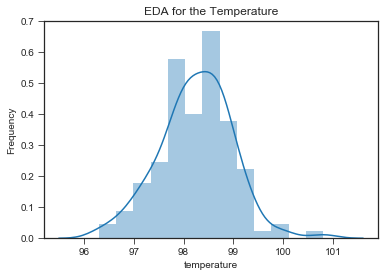

In [4]:
plt.title("EDA for the Temperature")
plt.ylabel('Frequency')
plt.xlabel('Temperature')
sns.distplot(df.temperature)

2. Is the sample size large? Are the observations independent? 
Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. ANSWER: The Sample size is 130 and though not large is good enough. If the sample size is more than 30 than it is good enough for the calculations and prediction. The Scatter plot below for Observation index Vs Temperature and Observation Index Vs Heart rate shows no pattern and we can infer that they are independent. Also the correlation coeffient is not big and we can say that they are not correlated to each other.

In [6]:
len(df)

130

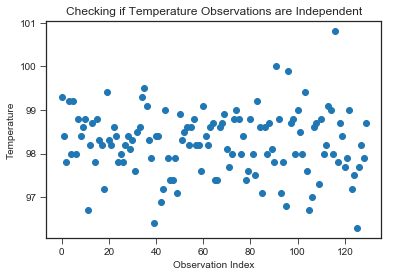

In [5]:
plt.scatter(df.index, df.temperature)
plt.xlabel('Observation index')
plt.ylabel('Temperature')
plt.title('EDA Temperature Observations are Independent')

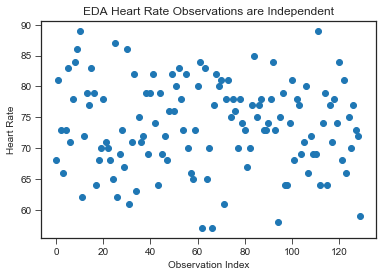

In [7]:
plt.scatter(df.index, df.heart_rate)
plt.xlabel('Observation Index')
plt.ylabel('Heart Rate')
plt.title('EDA Heart Rate Observations are Independent')

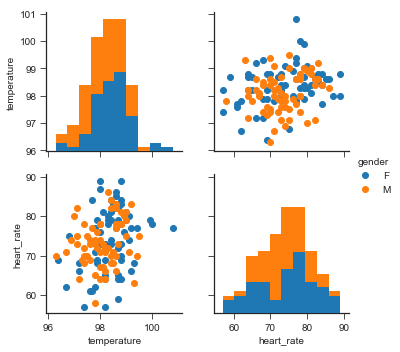

In [8]:
gender = sns.PairGrid(df, hue='gender')
gender.map_diag(plt.hist)
gender.map_offdiag(plt.scatter)
gender.add_legend()

In [9]:
df.corr()

,temperature,heart_rate
temperature,1.000000,0.253656
heart_rate,0.253656,1.000000


3. Is the true population mean really 98.6 degrees F? 
Would you use a one-sample or two-sample test? Why? 
In this situation, is it appropriate to use the t or z statistic? 
Now try using the other test. How is the result be different? Why? 

A)Is the true population mean really 98.6 degrees F? 

ANSWER: We use Hypothesis testing and consider
    h0 mean temperature is 98.6
    h1 mean temperature is not equal to 98.6
From below the p - value is 0.00000024 and is less than the desired 0.05 and we can discard the null hypothesis that the mean temperature is 98.6. So the alternate hypothesis is true.
B) Would you use a one-sample or two-sample test? Why?
ANSWER: one-sample test. A two sample test would require two different populations and  we are only comparing if a single population is different than a given value so we only need to use a one-sample test.
C) In this situation, is it appropriate to use the t or z statistic?
ANSWER: Since we dont have the Standard deviation we go with t-test. 
D)Now try using the other test. How is the result be different? Why? 
ANSWER: Both values are the same, since we are using the sample Standard Deviation and not the population Standard deviation. Also the sample size is more than 30 then we see the same values.The formula to compute the z-score and t-score are exactly the same with the exception of the z-score using the population statistic and t-score using the sample statistic. Since I used the sample statistic, this give me the same result as the t-test. For the z-statistic I used the sample Standard Deviation so the results are the same


In [9]:
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [8]:
xbar = df.temperature.mean()
sd = df.temperature.std()    

z = (xbar - 98.6)/(sd/len(df)**(1/2))
p = 1-stats.norm.cdf(abs(z))
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -5.454823292364079 
 p-value = 2.451078506826576e-08


4. Draw a small sample of size 10 from the data and repeat both tests. 
Which one is the correct one to use? 
What do you notice? What does this tell you about the difference in application of the t and zstatistic? 
ANSWER: When you use the sample size of 10 SD and mean will be different giving different t and z statistics.

In [6]:
perm_sample1 = df.temperature
perm_sample =perm_sample1.head(10)
xbar = np.mean(perm_sample)
sd = np.std(perm_sample)    

z = (xbar - 98.6)/(sd/len(df)**(1/2))
p = 1-stats.norm.cdf(abs(z))
print(' z-stat = {z} \n p-value = {p}'.format(z=z,p=p))

 z-stat = -0.6606090574188225 
 p-value = 0.2544315294761945


5.At what temperature should we consider someone's temperature to be "abnormal"? 
Start by computing the margin of error and confidence interval. 
ANSWER: With 95% confidence, we expect that the temperature would like between 98.12 degrees and 98.38 degrees farenheit. Anything above or below that interval will be considered abnormal

In [10]:
se = sd/(len(df)**(1/2))
me = 1.96*se
plus = xbar + 1.96*se
minus = xbar - 1.96*se 
print (' 95% Confidence Interval: {minus} to {plus} \n Margin of Error: {me}'.format(minus=minus,plus=plus, me=me))

 95% Confidence Interval: 98.12319411222852 to 98.37526742623304 
 Margin of Error: 0.12603665700226638


6.Is there a significant difference between males and females in normal temperature? 
What test did you use and why? 
Write a story with your conclusion in the context of the original problem.


A) Is there a significant difference between males and females in normal temperature? 

ANSWER: 
h0 = mean of females - mean of males is the same == 0
h1 = mean of females - mean of males is signficantly different != 0
We see that the p - value 0.024 and is less than 0.05 we would reject the null hypothesis and so the alternate hypothesis is true. So we see that there is a significant difference between the normal body temperature of females and males.

B) What test did you use and why?
ANSWER: I used 2 sample t -test since we have two groups that are independent of each other. If we use 1 Sample test then it would be case where we have one group that we are testing and also the t -test would be the same. Now since we need to compare two different groups that are independent of each other then we do a 2 sample t-test. A paired t-test is the same as the 1 sample t-test since the results of the pre treatment will be used for the post treatment and the results are dependent. Since we have two independent group, then we use the 2 sample t-test.

C) Write a story with your conclusion in the context of the original problem.
With 95% confidence the normal body temperature is between 98.12319411222852 to 98.37526742623304 given that we have used 130 samples. Now this could be because the population of male and female have changed over the years. So the human body mean temperature that has been established for 120 years, which is 98.6 F and 37 C seem to be changed over the years because of the difference in the male and female temperatures.



In [ ]:
female = df.temperature[df.gender == 'F']
male = df.temperature[df.gender == 'M']
stats.ttest_ind(female,male)